<a href="https://colab.research.google.com/github/Dishantkharkar/Dishantkharkar/blob/main/Iris_ML_MODEL_K_Means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Using Iris data cluster iris flowers into differnt clusters based on similarity.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
data=pd.read_csv('Iris.csv')

In [ ]:
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [ ]:
# drop unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Basic Checks

In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.target.unique()

array([0, 1, 2], dtype=int64)

In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

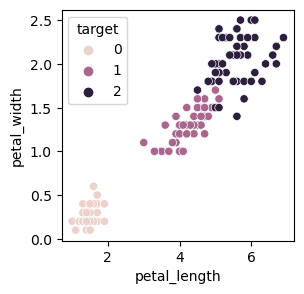

In [ ]:
# EDA
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='target')

# Data Preprocessing

In [ ]:
# check for missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [ ]:
# check for duplictes
data.duplicated().sum()

3

# check for outliers

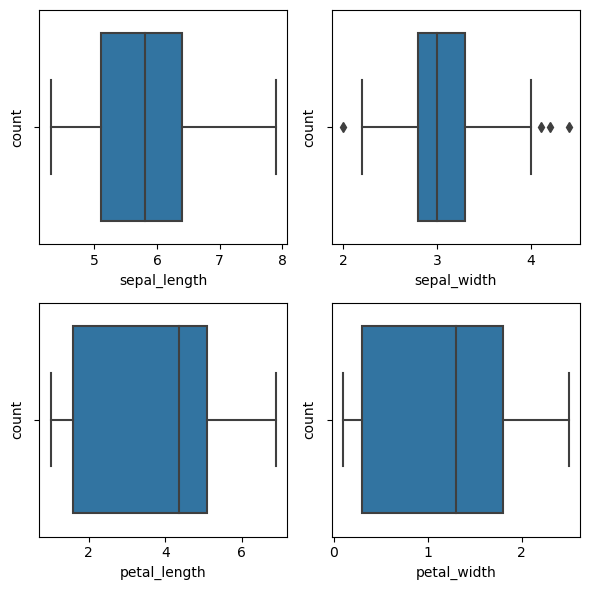

In [ ]:
plt.figure(figsize=(6,6),facecolor='white')
plotnumber=1
for column in data.drop('target',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()   

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

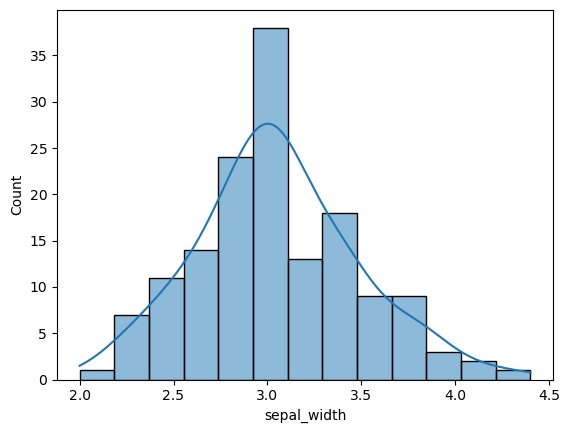

In [ ]:
sns.histplot(data=data,x='sepal_width',kde=True)

### Insights
* It shows Normal distribution in sepal_width column, then we use 3-sigma rule to identified outliers
* Replace Outliers with mean since data is Normal

#### 3-sigma Rule

In [ ]:
low_limit=data['sepal_width'].mean()-3*data['sepal_width'].std()
upper_limit=data['sepal_width'].mean()+3*data['sepal_width'].std()
print('lower limit',low_limit)
print('upper limit',upper_limit)

lower limit 1.7532170659134796
upper limit 4.354782934086522


In [ ]:
# find values less than lower limit
data.loc[data['sepal_width']<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [ ]:
# find values greater than upper limit
data.loc[data["sepal_width"]>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [ ]:
# replace outlier with mean
data.loc[data['sepal_width']>upper_limit,'sepal_width']=data['sepal_width'].mean()

<AxesSubplot:xlabel='sepal_width'>

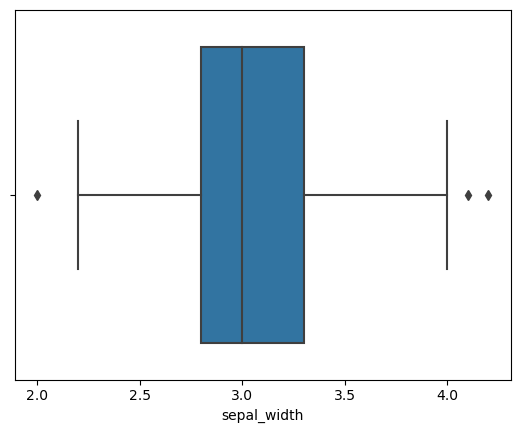

In [ ]:
sns.boxplot(data=data,x='sepal_width')

### Apply Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]=scaling.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0


In [ ]:
# Remove target from data
x=data.drop('target',axis=1)
# for only input 

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


## Apply K-Mean Model

In [ ]:
# import kmean model
from sklearn.cluster import KMeans
# Initialize the model
model=KMeans(n_clusters=6,random_state=10)
# Train a model
model.fit(x)

KMeans(n_clusters=6, random_state=10)

In [ ]:
# Centroids-cluster centers
# no. of clusters=no. of centroids
model.cluster_centers_

array([[ 8.62520255e-01,  2.30595812e-01,  8.54920301e-01,
         1.05353673e+00],
       [-7.92495572e-01,  1.41366221e+00, -1.28643762e+00,
        -1.22376293e+00],
       [-3.64080601e-01, -1.44114126e+00,  1.07449102e-01,
         1.75297293e-03],
       [-1.29723056e+00,  8.30471707e-02, -1.32834838e+00,
        -1.29504859e+00],
       [ 2.53602227e-01, -5.29727484e-01,  5.48764020e-01,
         4.93046703e-01],
       [ 1.97705575e+00,  1.91396054e-01,  1.44514709e+00,
         1.11927322e+00]])

In [ ]:
model.labels_

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 0, 0, 0, 2, 4, 4, 0, 2, 4, 2, 2, 4, 2, 4, 4, 0,
       4, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 4, 4, 0, 0, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 0, 4, 5, 4, 0, 5, 2, 5, 4, 5,
       0, 4, 0, 4, 4, 0, 0, 5, 5, 2, 0, 4, 5, 4, 0, 5, 4, 4, 0, 5, 5, 5,
       0, 4, 4, 5, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

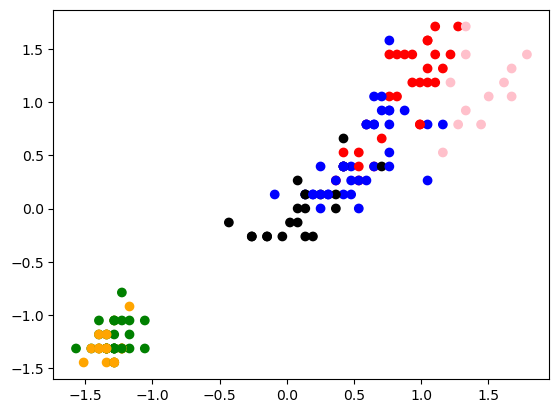

In [ ]:
# visualize the clusters created by model
color_schema=np.array(['red','green','black','orange','blue','pink'])
plt.scatter(data.petal_length,data.petal_width,color=color_schema[model.labels_])

In [ ]:
data['labels']=pd.DataFrame(model.labels_)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.3303281700316024

* We see overlapping of cluster beacase number of cluster that we have chosen might be wrong

## How To find optimal value for k?¶
#### Elbow Method


Text(0, 0.5, 'WCSS')

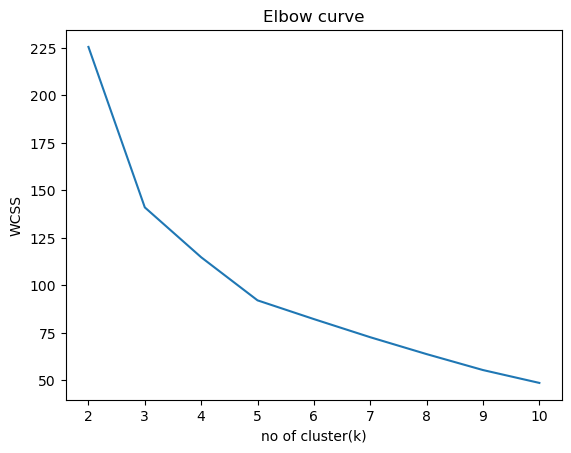

In [ ]:
WCSS=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('Elbow curve')
plt.xlabel('no of cluster(k)')
plt.ylabel('WCSS')


* From above graph optimal/Elbow point at 3
* therefore we use k=3


In [ ]:
WCSS

[225.50046206211442,
 141.06688377407846,
 114.82880681387994,
 92.15342859045302,
 82.29541504498772,
 72.74855093311186,
 63.86535212246592,
 55.48098553300095,
 48.709326122664]

## Build once again Model

In [ ]:
# import kmean model
from sklearn.cluster import KMeans
# Initialize the model
model=KMeans(n_clusters=3,random_state=10)
# Train a model
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [ ]:
silhouette_score(x,model.labels_)

0.461588416586402

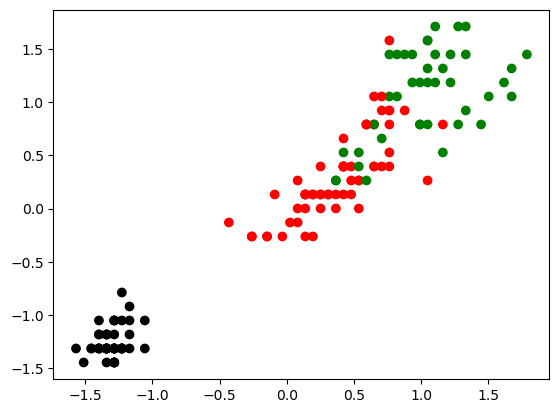

In [ ]:
# visualize the clusters created by model
color_schema=np.array(['red','green','black','orange','blue','pink'])
plt.scatter(data.petal_length,data.petal_width,color=color_schema[model.labels_])